<a href="https://colab.research.google.com/github/Aishuav01/Product-Price-Analysis/blob/data_gathering/ProductPriceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import google.generativeai as genai

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("promptcloud/walmart-product-listing")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'walmart-product-listing' dataset.
Path to dataset files: /kaggle/input/walmart-product-listing


**Data Read**

In [30]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = 'marketing_sample_for_walmart_com-walmart_com_product_data__20201001_20201231__30k_data.csv'

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "promptcloud/walmart-product-listing",
  file_path,
  pandas_kwargs={"usecols": ["Uniq Id", "Crawl Timestamp", "Pageurl", "Website", "Title", "Num Of Reviews", 'Average Rating', 'Number Of Ratings', "Model Num", "Sku", "Upc", "Manufacturer", "Model Name", "Price", "Monthly Price", "Stock", "Carrier", "Color Category", "Internal Memory", "Screen Size", "Specifications", "Five Star", "Four Star", "Three Star", "Two Star", "One Star"]}
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3396814427.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'walmart-product-listing' dataset.
First 5 records:                             Uniq Id            Crawl Timestamp  \
0  39b31da4de3b467d0852bb98c849061c  2020-10-06 05:27:30 +0000   
1  be7c60fb9e44f18ab874834a7bacc606  2020-10-15 05:29:13 +0000   
2  37c90dcb22a803d14ad463e77b29f1b1  2020-12-06 00:35:55 +0000   
3  718c6f03c77e69062f0e2f121ca1a0bf  2020-10-12 03:11:51 +0000   
4  f59bb5c9f8271a16aa974cf86d93d4bb  2020-10-05 05:07:45 +0000   

                                             Pageurl      Website  \
0  https://www.walmart.com/ip/Zmodo-1080p-Full-HD...  walmart.com   
1  https://www.walmart.com/ip/Parrot-Bebop-2-SkyC...  walmart.com   
2  https://www.walmart.com/ip/Box-of-50-Disposabl...  walmart.com   
3  https://www.walmart.com/ip/New-iPad-9-7-inch-C...  walmart.com   
4  https://www.walmart.com/ip/TOWNSTEEL-FME-2020-...  walmart.com   

                                               Title  Num Of Reviews  \
0  Zmodo Zmodo 1080p 

**Data Cleaning **

In [35]:
df.head()

,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Num Of Reviews,Average Rating,Number Of Ratings,Model Num,Sku,...,Carrier,Color Category,Internal Memory,Screen Size,Specifications,Five Star,Four Star,Three Star,Two Star,One Star
0,39b31da4de3b467d0852bb98c849061c,2020-10-06 05:27:30 +0000,https://www.walmart.com/ip/Zmodo-1080p-Full-HD...,walmart.com,Zmodo Zmodo 1080p Full HD Outdoor Wireless Sec...,14.0,4.5,4.5,SD-H1080P-Z-4,739484620.0,...,NaN,NaN,NaN,NaN,Brand : Zmodo | Manufacturer Part Number : SD-...,11.0,1.0,1.0,0,1
1,be7c60fb9e44f18ab874834a7bacc606,2020-10-15 05:29:13 +0000,https://www.walmart.com/ip/Parrot-Bebop-2-SkyC...,walmart.com,Parrot Parrot Bebop 2 SkyController BLACK EDITION,NaN,NaN,0.0,NaN,903222669.0,...,NaN,NaN,NaN,NaN,Brand : Parrot,NaN,NaN,NaN,NaN,NaN
2,37c90dcb22a803d14ad463e77b29f1b1,2020-12-06 00:35:55 +0000,https://www.walmart.com/ip/Box-of-50-Disposabl...,walmart.com,"McSimon Box of 50 Disposable Face Masks, 3-ply...",NaN,4.0,4.0,NaN,723896004.0,...,NaN,NaN,NaN,NaN,Brand : McSimon,27.0,5.0,1.0,2,7
3,718c6f03c77e69062f0e2f121ca1a0bf,2020-10-12 03:11:51 +0000,https://www.walmart.com/ip/New-iPad-9-7-inch-C...,walmart.com,"Mignova New iPad 9.7 inch Case, Mignova iPad 9...",NaN,3.8,2.7,NaN,810922653.0,...,NaN,Black+Black,NaN,NaN,Brand : Mignova,37.0,6.0,5.0,5,12
4,f59bb5c9f8271a16aa974cf86d93d4bb,2020-10-05 05:07:45 +0000,https://www.walmart.com/ip/TOWNSTEEL-FME-2020-...,walmart.com,TownSteel TOWNSTEEL FME-2020-RFID-S-626 Classr...,NaN,NaN,0.0,FME-2020-RFID-S-626,48149498.0,...,NaN,NaN,NaN,NaN,Brand : TownSteel | Manufacturer Part Number :...,NaN,NaN,NaN,NaN,NaN


**Rename Colums**

In [37]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Pageurl', 'Website', 'Title',
       'Num Of Reviews', 'Average Rating', 'Number Of Ratings', 'Model Num',
       'Sku', 'Upc', 'Manufacturer', 'Model Name', 'Price', 'Monthly Price',
       'Stock', 'Carrier', 'Color Category', 'Internal Memory', 'Screen Size',
       'Specifications', 'Five Star', 'Four Star', 'Three Star', 'Two Star',
       'One Star'],
      dtype='object')

In [55]:
df.rename(columns={'Uniq Id': 'id', 'Crawl Timestamp': 'insert_ts', 'Pageurl': 'pageurl', 'Website': 'website', 'Title': 'title', 'Num Of Reviews': 'num_of_reviews', 'Average Rating': 'average_rating', 'Number Of Ratings': 'number_of_ratings', 'Model Num': 'model_id', 'Sku': 'sku', 'Upc': 'upc', 'Manufacturer': 'manufacturer', 'Model Name': 'model_name', 'Price': 'price', 'Monthly Price': 'monthly_price', 'Stock': 'stock', 'Carrier': 'carrier', 'Color Category': 'color_category', 'Internal Memory': 'internal_memory', 'Screen Size': 'screen_size', 'Specifications': 'specifications','Five Star': 'five_star', 'Four Star': 'four_star', 'Three Star': 'three_star', 'Two Star': 'two_star', 'One Star': 'one_star'}, inplace=True)

In [56]:
df.columns

Index(['id', 'insert_ts', 'pageurl', 'website', 'title', 'num_of_reviews',
       'average_rating', 'number_of_ratings', 'model_id', 'sku', 'upc',
       'manufacturer', 'model_name', 'price', 'monthly_price', 'stock',
       'carrier', 'color_category', 'internal_memory', 'screen_size',
       'specifications', 'five_star', 'four_star', 'three_star', 'two_star',
       'one_star', 'insert_month', 'insert_year'],
      dtype='object')

**Data Fix**

In [47]:
df['insert_ts'] = pd.to_datetime(df['insert_ts'])
df['insert_month'] = df['insert_ts'].dt.month
df['insert_year'] = df['insert_ts'].dt.year

In [84]:
df['five_star'].fillna(0, inplace=True)
df['four_star'].fillna(0, inplace=True)
df['three_star'].fillna(0, inplace=True)
df['two_star'].fillna(0, inplace=True)
df['one_star'].fillna(0, inplace=True)

/tmp/ipython-input-2406614644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['five_star'].fillna(0, inplace=True)
/tmp/ipython-input-2406614644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [63]:
df['monthly_price'].fillna(0, inplace=True)

/tmp/ipython-input-2414555334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['monthly_price'].fillna(0, inplace=True)


In [69]:
df.drop(columns=['monthly_price'], inplace=True)

In [71]:
df.drop(columns=['insert_year'], inplace=True)

In [80]:
df['price'] = df['price'].fillna(0)

In [82]:
df['model_name'] = df['model_name'].fillna('Unknown')

,sku
0,739484620.0
1,903222669.0
2,723896004.0
3,810922653.0
4,48149498.0
...,...
29995,417919751.0
29996,219608832.0
29997,121547248.0
29998,473383573.0


**Data Check**

In [72]:
df.describe()

,num_of_reviews,average_rating,number_of_ratings,sku,upc,price,five_star,four_star,three_star,insert_month
count,10181.000000,11517.000000,29997.000000,2.996300e+04,2.442400e+04,29931.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,31.157057,3.864531,8.972135,5.119959e+08,6.139755e+11,76.739455,20.190000,4.158933,1.466567,10.993733
std,537.574610,1.157605,303.630250,5.545540e+08,2.610250e+11,334.461713,316.037376,80.965525,30.675577,0.913887
min,0.000000,1.000000,0.000000,3.765000e+03,7.939600e+04,0.010000,0.000000,0.000000,0.000000,10.000000
25%,0.000000,3.300000,0.000000,2.617360e+08,6.057504e+11,11.980000,0.000000,0.000000,0.000000,10.000000
50%,0.000000,4.200000,0.000000,5.080023e+08,7.167154e+11,19.990000,0.000000,0.000000,0.000000,11.000000
75%,1.000000,4.800000,1.000000,7.550676e+08,7.913300e+11,45.980000,1.000000,0.000000,0.000000,12.000000
max,27224.000000,5.000000,27224.000000,8.296100e+10,9.999900e+11,41500.000000,20901.000000,6740.000000,4392.000000,12.000000


In [107]:
df.groupby(['manufacturer']['sku'])['price'].mean()

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
/tmp/ipython-input-3428644659.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df.groupby(['manufacturer']['sku'])['price'].mean()


TypeError: list indices must be integers or slices, not str

In [76]:
df['sku'].nunique()

29963

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 30000 non-null  object             
 1   insert_ts          30000 non-null  datetime64[ns, UTC]
 2   pageurl            30000 non-null  object             
 3   website            30000 non-null  object             
 4   title              29949 non-null  object             
 5   num_of_reviews     10181 non-null  float64            
 6   average_rating     11517 non-null  float64            
 7   number_of_ratings  29997 non-null  float64            
 8   model_id           10605 non-null  object             
 9   sku                29963 non-null  float64            
 10  upc                24424 non-null  float64            
 11  manufacturer       29647 non-null  object             
 12  model_name         30000 non-null  object     

** Data Analysis **

In [166]:
df = df.copy()

# Keep only relevant columns
product_df = df[['id', 'title', 'insert_ts', 'insert_month' ,'sku', 'manufacturer' ,'model_id', 'price', 'stock']].dropna(subset=['price'])
product_df['insert_dateid'] = product_df['insert_ts'].dt.strftime('%Y%m%d').astype(int)
product_df['insert_date'] = product_df['insert_ts'].dt.strftime('%m%d')




In [167]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             30000 non-null  object             
 1   title          29949 non-null  object             
 2   insert_ts      30000 non-null  datetime64[ns, UTC]
 3   insert_month   30000 non-null  int32              
 4   sku            29963 non-null  float64            
 5   manufacturer   29647 non-null  object             
 6   model_id       10605 non-null  object             
 7   price          30000 non-null  float64            
 8   stock          30000 non-null  bool               
 9   insert_dateid  30000 non-null  int64              
 10  insert_date    30000 non-null  object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int32(1), int64(1), object(5)
memory usage: 2.2+ MB


In [168]:
model_price_trend = product_df.groupby(['insert_month','insert_date','model_id'])['price'].mean().reset_index()
model_price_trend



,insert_month,insert_date,model_id,price
0,10,1001,007a,12.00
1,10,1001,01-100-016,49.62
2,10,1001,01-865-10SARBGM,20.98
3,10,1001,035046001933,8.76
4,10,1001,035046082413,27.55
...,...,...,...,...
9704,12,1231,"iPad PRO 10.5"" 2017/Air 3 10.5"" 2019 Watercolo...",16.99
9705,12,1231,iPhone SE,107.49
9706,12,1231,warmknit_27573,13.99
9707,12,1231,warmknit_33414,13.99


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

model_id_to_plot = "A1984"  # replace with an actual one from your data

model_df = model_price_trend[model_price_trend['model_id'] == model_id_to_plot]

plt.figure(figsize=(12,6))
sns.lineplot(data=model_df, x='insert_date', y='price', marker='o')
plt.title(f"Price Trend for Model {model_id_to_plot}")
plt.xlabel("Insert Date")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.show()


In [159]:
sku_price_trend = product_df.groupby(['insert_month','insert_date','model_id','manufacturer'])['price'].mean().reset_index()
sku_price_trend

,insert_month,insert_date,model_id,manufacturer,price
0,10,2020-10-01,007a,CPG,12.00
1,10,2020-10-01,01-100-016,Briggs Healthcare,49.62
2,10,2020-10-01,01-865-10SARBGM,McKesson Brand,20.98
3,10,2020-10-01,035046001933,Windmill,8.76
4,10,2020-10-01,035046082413,RejuviCare,27.55
...,...,...,...,...,...
9789,12,2020-12-31,"iPad PRO 10.5"" 2017/Air 3 10.5"" 2019 Watercolo...","DuraSafe LLC, USA",16.99
9790,12,2020-12-31,iPhone SE,Apple,107.49
9791,12,2020-12-31,warmknit_27573,Kozmos,13.99
9792,12,2020-12-31,warmknit_33414,Kozmos,13.99


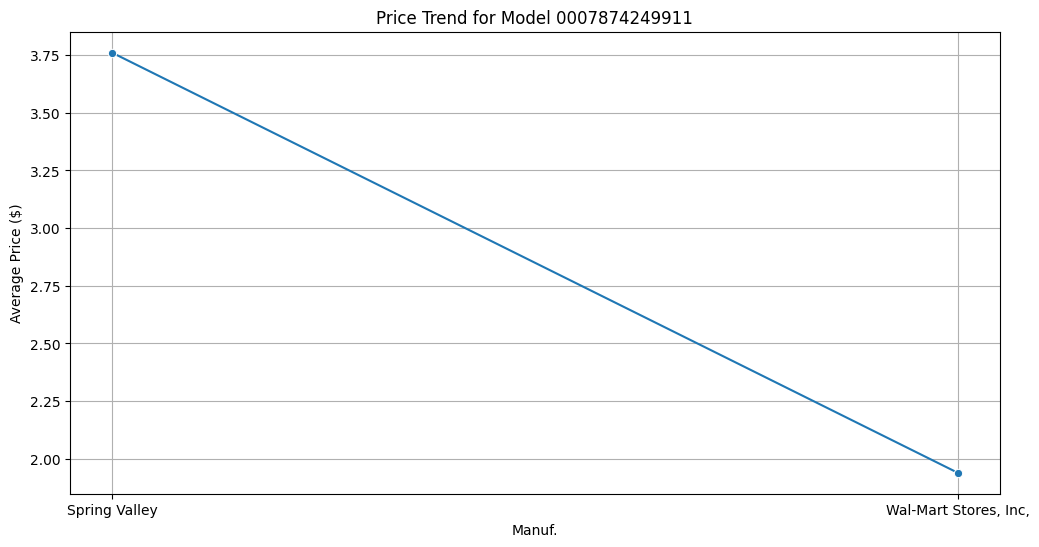

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

sku_id_to_plot = "0007874249911"  # replace with an actual one from your data

model_df = sku_price_trend[sku_price_trend['model_id'] == sku_id_to_plot]

plt.figure(figsize=(12,6))
sns.lineplot(data=model_df, x='manufacturer', y='price', marker='o')
plt.title(f"Price Trend for Model {sku_id_to_plot}")
plt.xlabel("Manuf.")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.show()


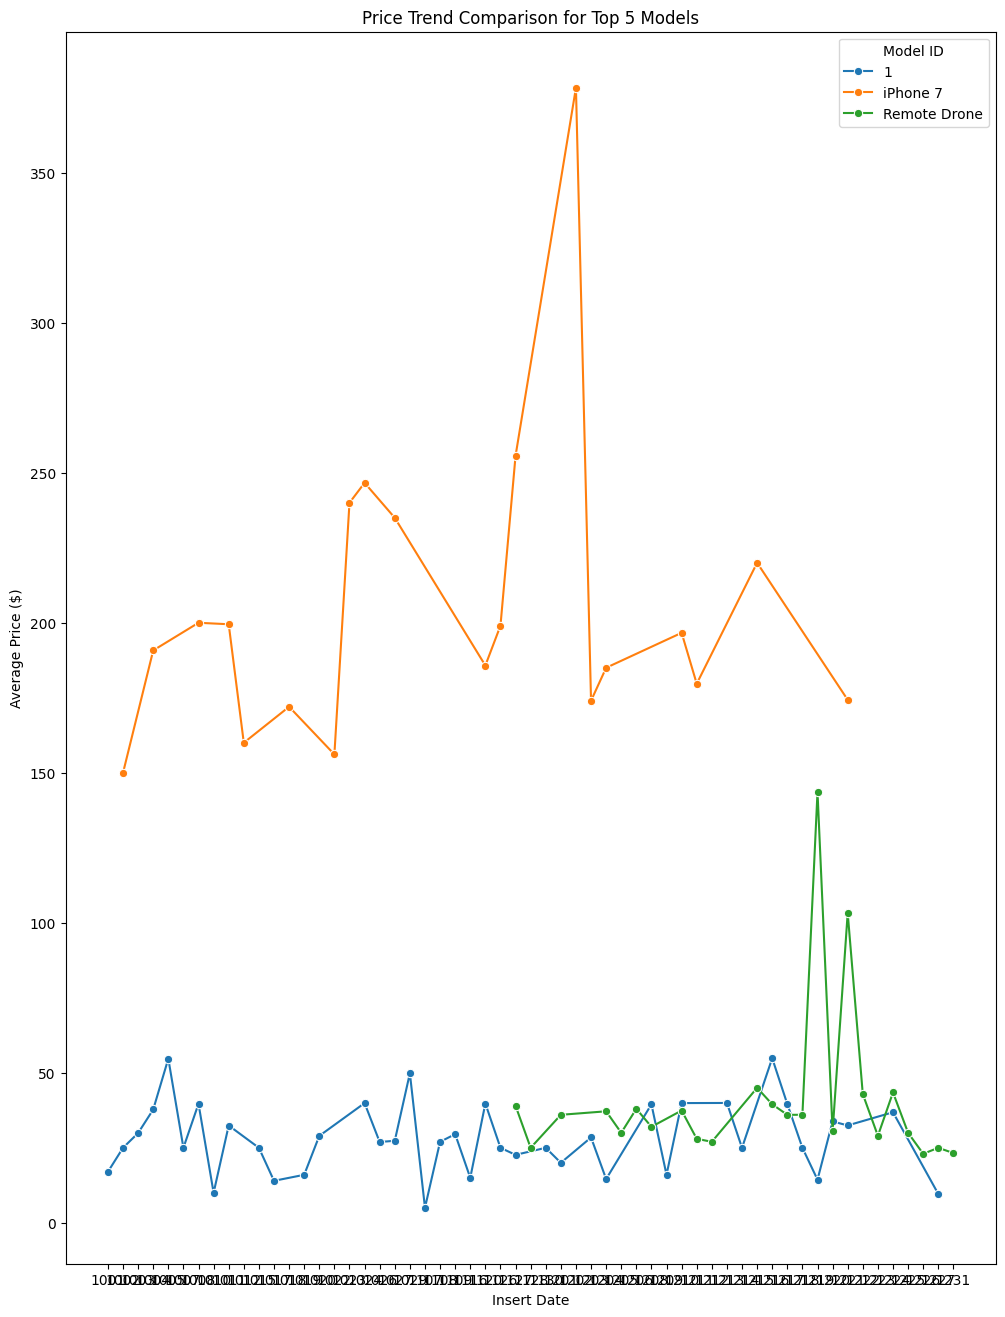

In [192]:
top_models = (
    model_price_trend['model_id'].value_counts()
    .nlargest(3)
    .index
)
plt.figure(figsize=(12,16))

sns.lineplot(
    data=model_price_trend[model_price_trend['model_id'].isin(top_models)],
    x='insert_date',
    y='price',
    hue='model_id',
    marker='o'
)
plt.title("Price Trend Comparison for Top 5 Models")

plt.xlabel("Insert Date")
plt.ylabel("Average Price ($)")
plt.legend(title="Model ID")
plt.show()


**Gen AI**

In [178]:
genai.configure(api_key="******")

In [191]:
prompt = f"""
You are a data analyst. Analyze this dataset of Walmart product prices.
The data contains average prices for multiple model_ids across time.

Suggest trends, insights, and possible predictions or anomalies.
Return structured JSON with:
- model_id
- overall_trend (increasing/decreasing/stable)
- any anomalies detected
- price range
Here’s the data (sample):
{model_price_trend.to_dict()}
"""

response = genai.GenerativeModel("gemini-2.5-flash-lite").generate_content(prompt)

print(response.text)

KeyboardInterrupt: 